In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten


In [2]:
import pathlib


data_dir = pathlib.Path('dataset')


In [5]:
img_height,img_width=240,240
batch_size=32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode='categorical',  
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2599 files belonging to 3 classes.
Using 2080 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2599 files belonging to 3 classes.
Using 519 files for validation.


In [7]:
class_names=train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'rose']


In [8]:
#define model - get from keras/application

In [15]:
model = Sequential()



pretrained_model= tf.keras.applications.EfficientNetB0(
                    include_top=False,
                    weights="imagenet",
                    input_shape=(240,240,3),
                    pooling='avg',
                    classes=3,
)

for layer in pretrained_model.layers:
        layer.trainable=False

model.add(pretrained_model)

#Now, that we have imported a pre-trained model, we will also add a fully connected and output layer where actual learning can take place.

In [10]:
model.add(Flatten()) #flatten to 1D
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))#output layer

In [11]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 1280)             4049571   
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 4,706,982
Trainable params: 657,411
Non-trainable params: 4,049,571
_________________________________________________________________


#The key point to note over here is that the total number of parameters in the Resnet50 model is 24 million. But the trainable parameters are only 1 million.

In [12]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

hist = model.fit(train_ds, validation_data=val_ds, epochs=20)



Epoch 1/20


2022-05-15 02:28:56.085412: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-15 02:28:56.085904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


65/65 [==============================] - ETA: 0s - loss: 0.2169 - accuracy: 0.9125

2022-05-15 02:29:17.726280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


65/65 [==============================] - 29s 330ms/step - loss: 0.2169 - accuracy: 0.9125 - val_loss: 0.1202 - val_accuracy: 0.9557
Epoch 2/20
65/65 [==============================] - 19s 293ms/step - loss: 0.0783 - accuracy: 0.9726 - val_loss: 0.1177 - val_accuracy: 0.9557
Epoch 3/20
65/65 [==============================] - 19s 289ms/step - loss: 0.0423 - accuracy: 0.9880 - val_loss: 0.1086 - val_accuracy: 0.9576
Epoch 4/20
65/65 [==============================] - 18s 279ms/step - loss: 0.0216 - accuracy: 0.9952 - val_loss: 0.1111 - val_accuracy: 0.9634
Epoch 5/20
65/65 [==============================] - 19s 290ms/step - loss: 0.0187 - accuracy: 0.9947 - val_loss: 0.0989 - val_accuracy: 0.9653
Epoch 6/20
65/65 [==============================] - 19s 288ms/step - loss: 0.0153 - accuracy: 0.9957 - val_loss: 0.1227 - val_accuracy: 0.9538
Epoch 7/20
65/65 [==============================] - 18s 285ms/step - loss: 0.0074 - accuracy: 0.9995 - val_loss: 0.1175 - val_accuracy: 0.9557
Epoch 8/20

Graph for 20 epochs

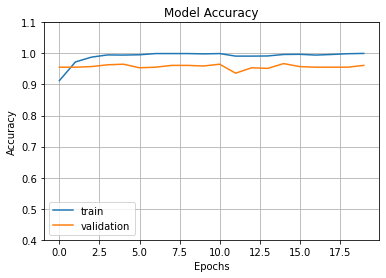

In [14]:
fig1 = plt.gcf()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1.1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()